# About this Dataset

## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Loading Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
#Load data to describe 
df_train = pd.read_csv('/workspaces/AwanaAcceleratorAI/Module-1/Project/data/loan-train.csv')
df_test = pd.read_csv('/workspaces/AwanaAcceleratorAI/Module-1/Project/data/loan-test.csv')

In [53]:
#Porportion of Train and Test
print(f'Total rows in train dataset {len(df_train)}')
print(f'Total rows in test dataset {len(df_test)}')
print(f'Total rows of the dataset {len(df_test)+len(df_train)}')
print(f'The proportion of traind dataset is {len(df_train)/(len(df_train)+len(df_test))}')
print(f'The proportion of test dataset is {len(df_test)/(len(df_train)+len(df_test))}')

Total rows in train dataset 614
Total rows in test dataset 367
Total rows of the dataset 981
The proportion of traind dataset is 0.6258919469928644
The proportion of test dataset is 0.37410805300713557


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



Dataset Key Information.

        Loan_ID--------------> Unique Loan ID.
        Gender --------------> Male/ Female
        Married --------------> Applicant married (Y/N)
        Dependents ------------> Number of dependents
        Education -------------> Applicant Education (Graduate/ Under Graduate)
        Self_Employed ---------> Self-employed (Y/N)
        ApplicantIncome -------> Applicant income
        CoapplicantIncome -----> Coapplicant income
        LoanAmount -----------> Loan amount in thousands
        Loan_Amount_Term ------> Term of a loan in months
        Credit_History --------> Credit history meets guidelines
        Property_Area ---------> Urban/ Semi-Urban/ Rural
        Loan_Status -----------> Loan approved (Y/N)



In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In the data set we have:
-  12 independent variables
- 1 target variable **Loan_Status** 

In [56]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Missing Values**

We are going to check the percentage of NAN values in each feature

In [58]:
for col in df_train.columns:
    miss = df_train[col].isna().sum() 
    if miss > 0:
        print(f"{col} has total {miss} missing values")

Gender has total 13 missing values
Married has total 3 missing values
Dependents has total 15 missing values
Self_Employed has total 32 missing values
LoanAmount has total 22 missing values
Loan_Amount_Term has total 14 missing values
Credit_History has total 50 missing values


In [59]:
import numpy as np
## 1 -step make the list of features which has missing values
features_with_nan=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_nan:
    print(feature, 100*np.round(df_train[feature].isnull().mean(), 1),  ' % missing values')

Gender 0.0  % missing values
Married 0.0  % missing values
Dependents 0.0  % missing values
Self_Employed 10.0  % missing values
LoanAmount 0.0  % missing values
Loan_Amount_Term 0.0  % missing values
Credit_History 10.0  % missing values


**Understanding Data Types**

In [60]:
df_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

Numerical data types

In [61]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


Lets check data with datatime format

In [62]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
len(year_feature)

0

Numerical variables are usually of 2 type, continous variable and discrete Variables

Discrete variables

In [63]:
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature
# visualise the numerical variables
df_train[discrete_feature].head()

Discrete Variables Count: 2


,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0


In [64]:
print(df_train.Loan_Amount_Term.unique())
print(df_train.Credit_History.unique())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]


Continous variables

In [65]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature
# visualise the numerical variables
df_train[continuous_feature].head()

Continuous feature Count 3


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


We can see there are three formats of data types:

    - object: Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
    - int64: It represents the integer variables. ApplicantIncome is of this format.
    - float64: It represents the variable that has some decimal values involved. They are also numerical

**Univariate Analysis**

Dependent variable

Loan_Status
Y    422
N    192
Name: count, dtype: int64
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


<Axes: xlabel='Loan_Status'>

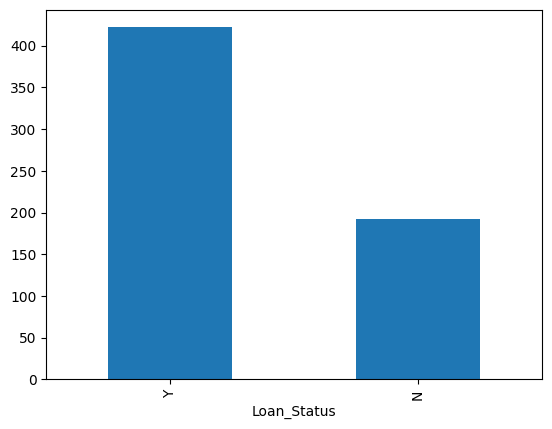

In [66]:
print(df_train['Loan_Status'].value_counts())
print(df_train['Loan_Status'].value_counts(normalize=True))
df_train['Loan_Status'].value_counts().plot.bar()

Independent Variables - Categorical and Numerical Discrete

Gender
Male      489
Female    112
Name: count, dtype: int64
Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64


<Axes: xlabel='Gender'>

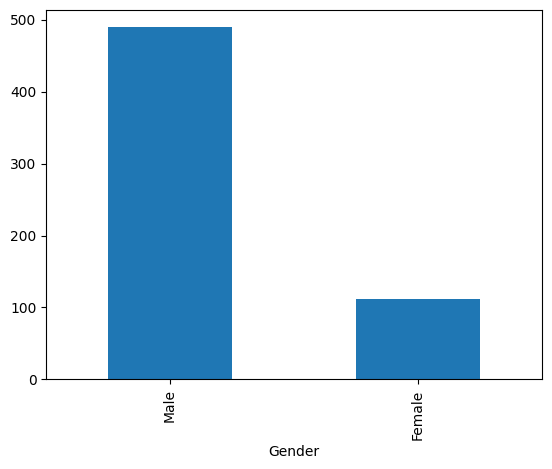

In [67]:
#Gender
print(df_train['Gender'].value_counts())
print(df_train['Gender'].value_counts(normalize=True))
df_train['Gender'].value_counts().plot.bar()

Married
Yes    398
No     213
Name: count, dtype: int64
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64


<Axes: xlabel='Married'>

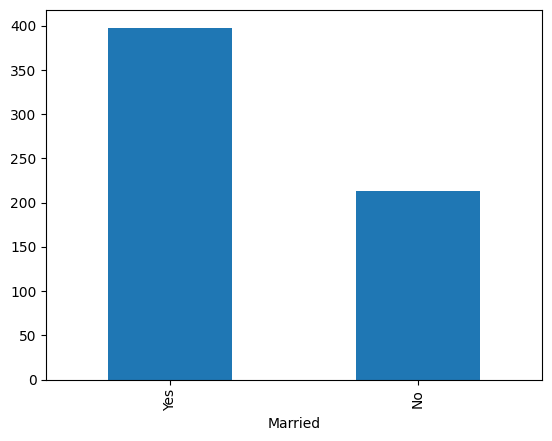

In [68]:
#Married, Dependents, Education, Self_Employed, Property_Area
print(df_train['Married'].value_counts())
print(df_train['Married'].value_counts(normalize=True))
df_train['Married'].value_counts().plot.bar()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64


<Axes: xlabel='Dependents'>

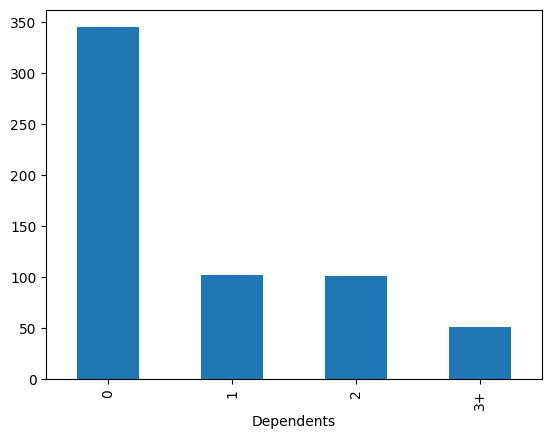

In [69]:
#Dependents
print(df_train['Dependents'].value_counts())
print(df_train['Dependents'].value_counts(normalize=True))
df_train['Dependents'].value_counts().plot.bar()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


<Axes: xlabel='Education'>

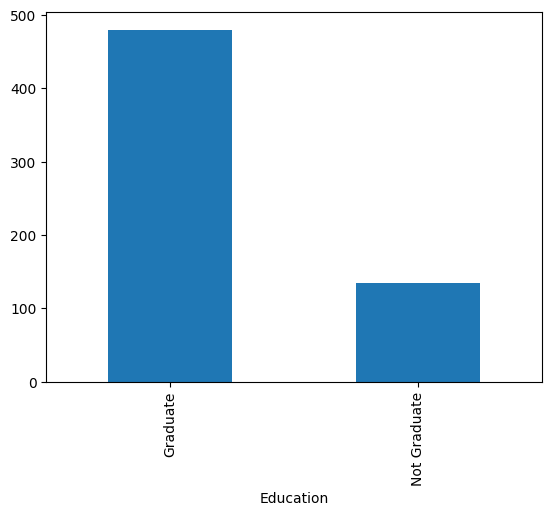

In [70]:
#Education
print(df_train['Education'].value_counts())
print(df_train['Education'].value_counts(normalize=True))
df_train['Education'].value_counts().plot.bar()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64


<Axes: xlabel='Self_Employed'>

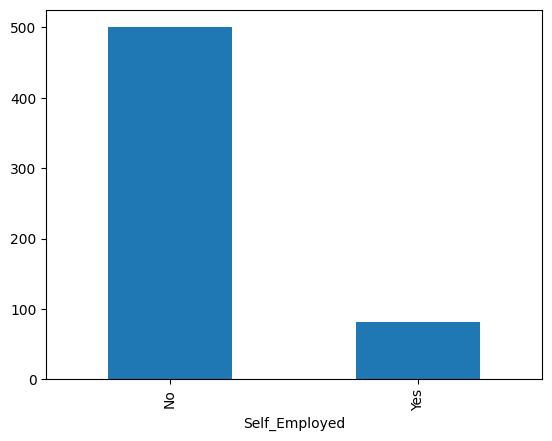

In [71]:
#Self_Employed
print(df_train['Self_Employed'].value_counts())
print(df_train['Self_Employed'].value_counts(normalize=True))
df_train['Self_Employed'].value_counts().plot.bar()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64


<Axes: xlabel='Property_Area'>

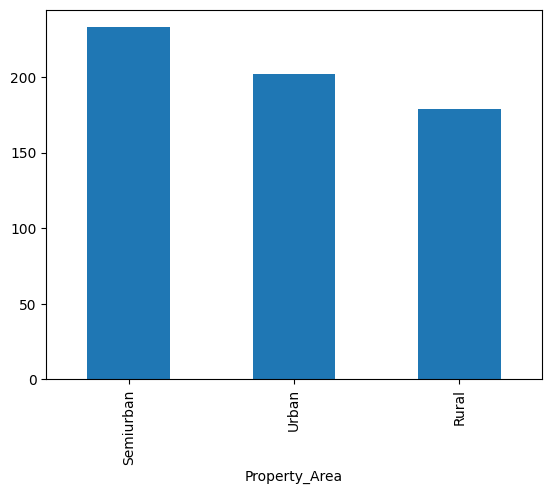

In [72]:
#Property_Area
print(df_train['Property_Area'].value_counts())
print(df_train['Property_Area'].value_counts(normalize=True))
df_train['Property_Area'].value_counts().plot.bar()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64


<Axes: xlabel='Credit_History'>

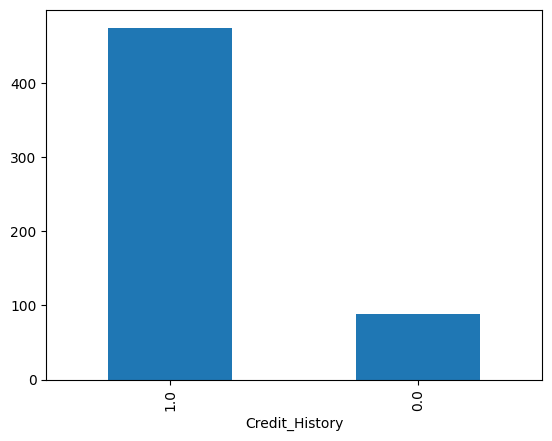

In [73]:
#Property_Area
print(df_train['Credit_History'].value_counts())
print(df_train['Credit_History'].value_counts(normalize=True))
df_train['Credit_History'].value_counts().plot.bar()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Loan_Amount_Term
360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: proportion, dtype: float64


<Axes: xlabel='Loan_Amount_Term'>

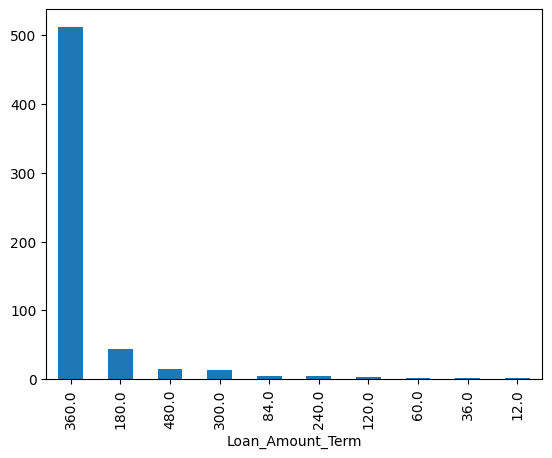

In [74]:
#Loan Amount Term
print(df_train['Loan_Amount_Term'].value_counts())
print(df_train['Loan_Amount_Term'].value_counts(normalize=True))
df_train['Loan_Amount_Term'].value_counts().plot.bar()

Independent Variables - Numerical Continous

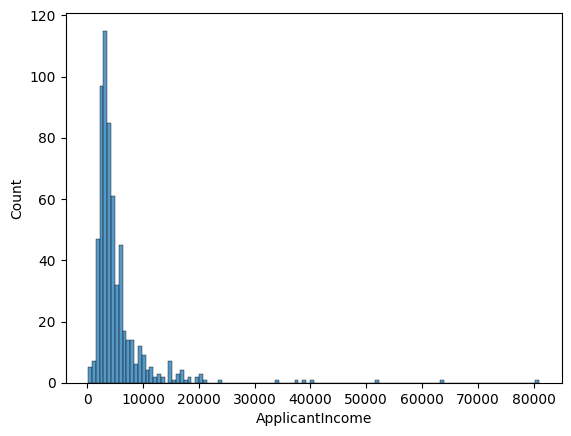

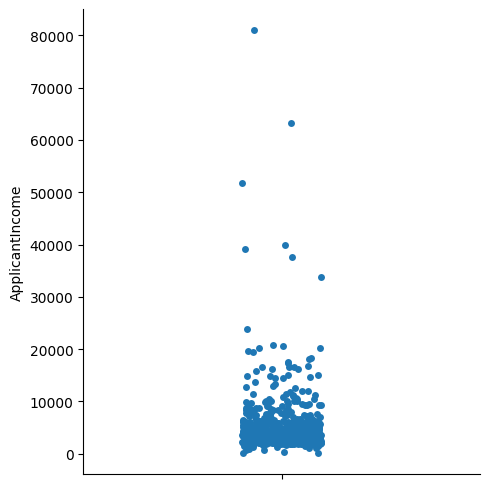

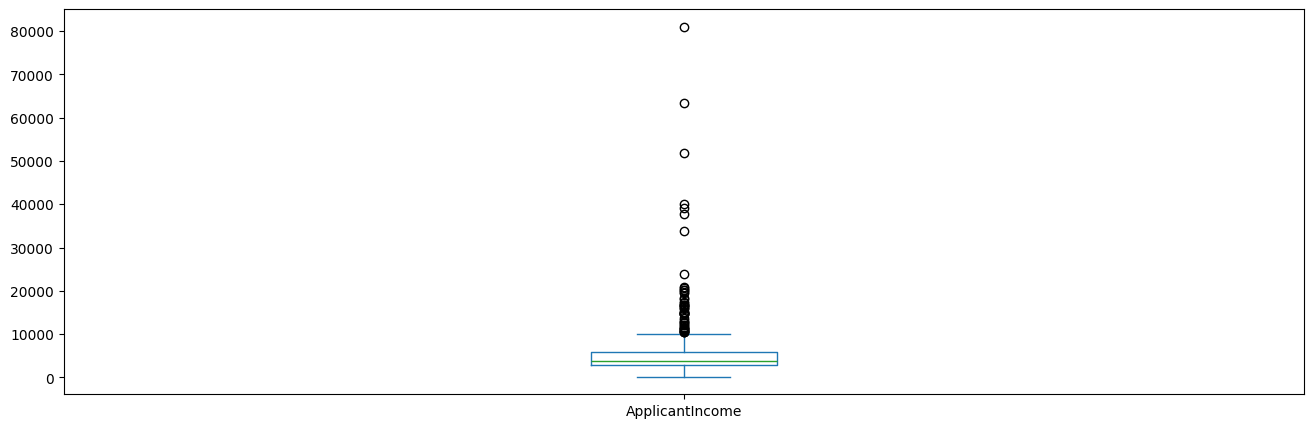

In [75]:
#ApplicantIncome 	CoapplicantIncome 	LoanAmount 	 	
sns.histplot(df_train['ApplicantIncome'])
plt.show()
sns.catplot(df_train['ApplicantIncome'])
plt.show()
df_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Applicant income leans left, suggesting non-normal distribution. We'll address this later as algorithms prefer normal data. The boxplot shows income outliers, likely due to social inequality and varying education levels. Let's analyze by education group. 

Text(0.5, 0.98, '')

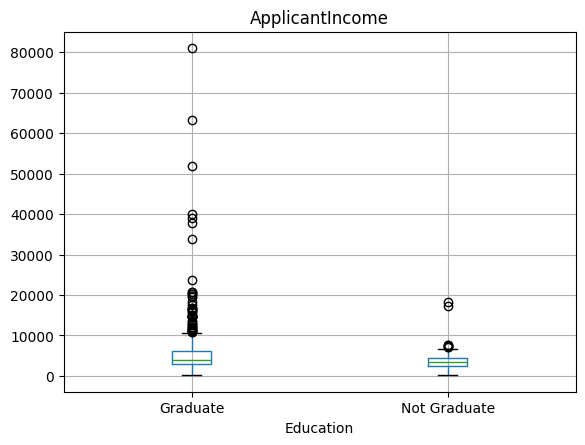

In [76]:
df_train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

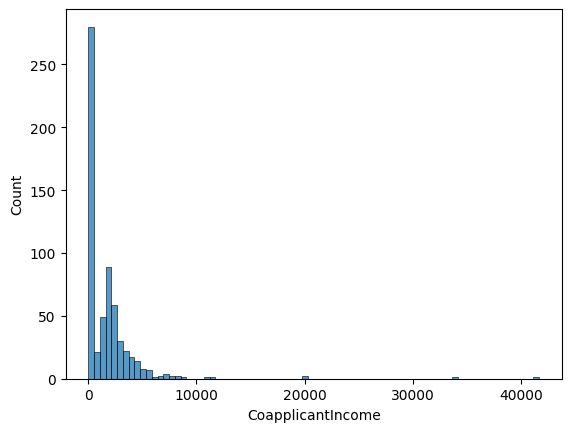

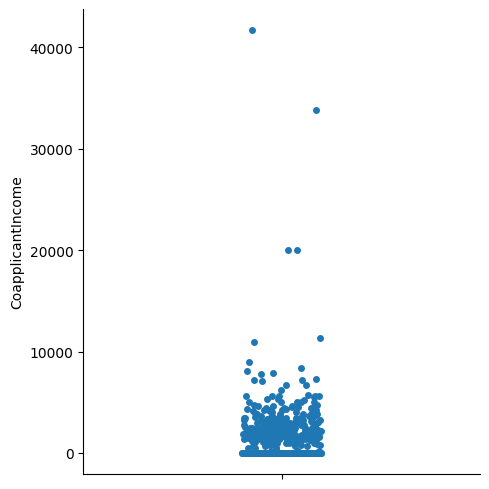

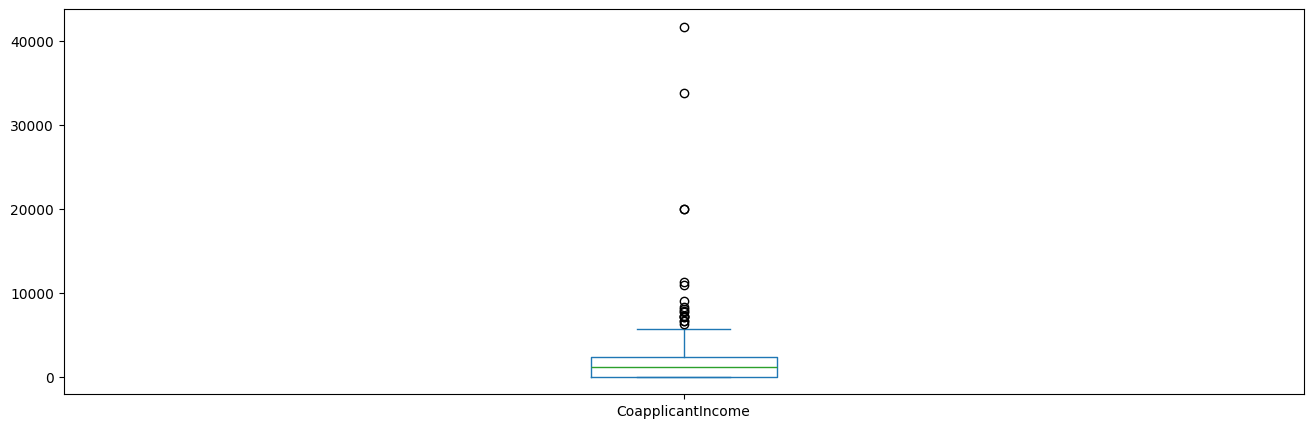

In [77]:
sns.histplot(df_train['CoapplicantIncome'])
plt.show()
sns.catplot(df_train['CoapplicantIncome'])
plt.show()
df_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**Bivariate Analysis**

Analysis of the independet variables related to dependent variable

Categorical Independent Variable vs Target Variable

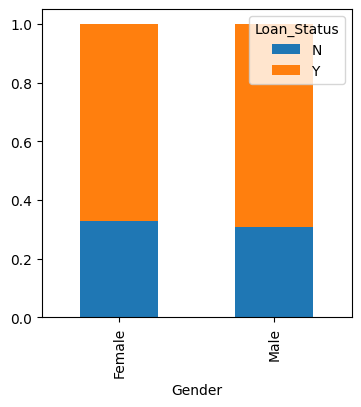

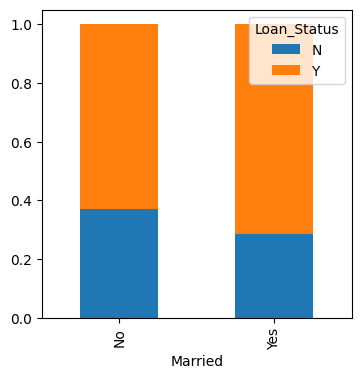

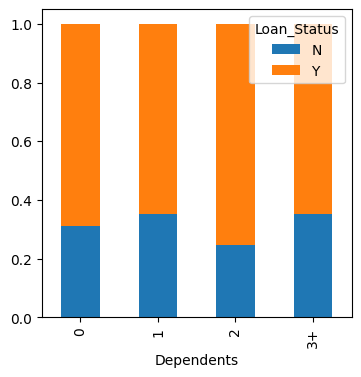

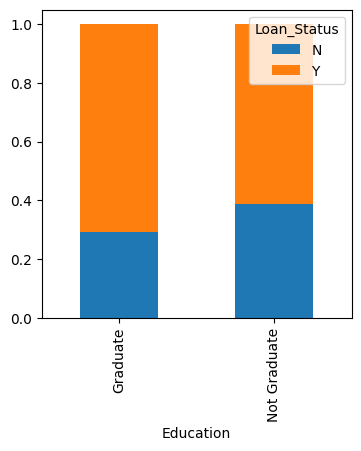

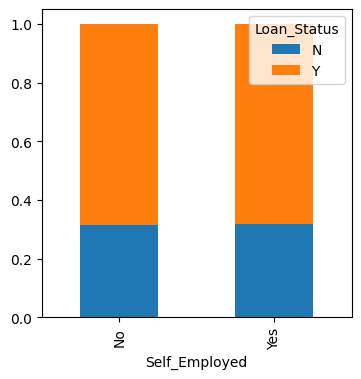

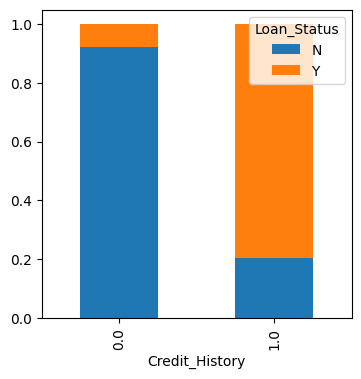

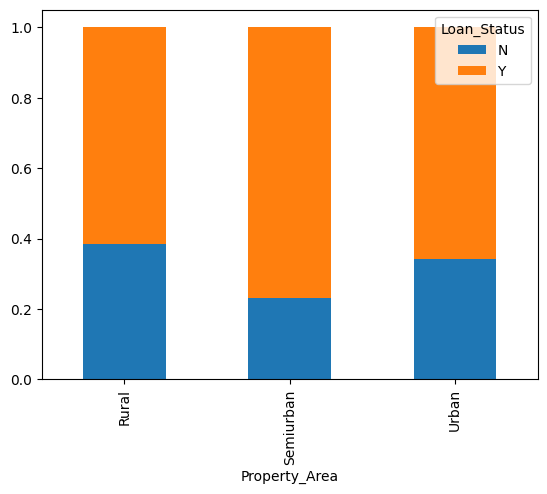

In [78]:
Gender = pd.crosstab(df_train["Gender"],df_train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Married=pd.crosstab(df_train["Married"],df_train["Loan_Status"])
Dependents=pd.crosstab(df_train["Dependents"],df_train["Loan_Status"])
Education=pd.crosstab(df_train['Education'],df_train['Loan_Status'])
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Credit_History=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
Property_Area=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

    - The proportion of married applicants is higher for approved loans.
    - Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
    - There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
    - It seems people with a credit history as 1 are more likely to get their loans approved.
    - The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

Numerical Independent Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

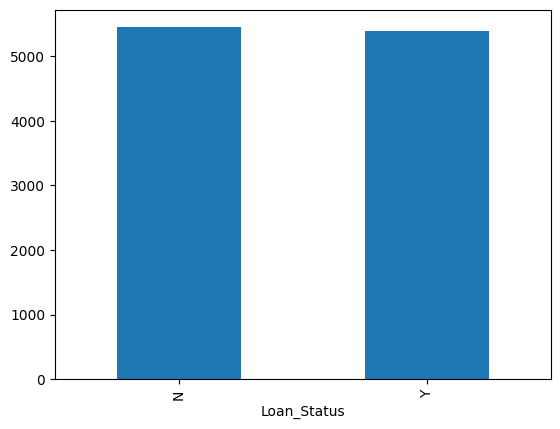

In [79]:
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

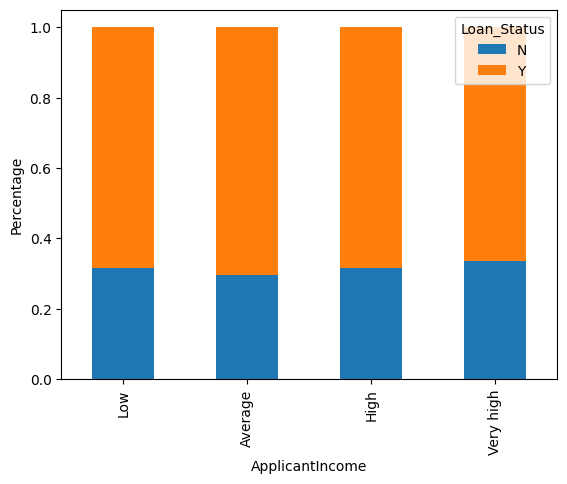

In [80]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df_train['Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df_train['Income_bin'],df_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

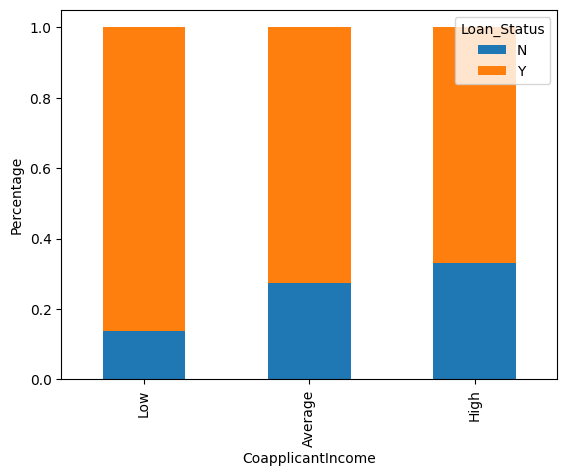

In [81]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df_train['Coapplicant_Income_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

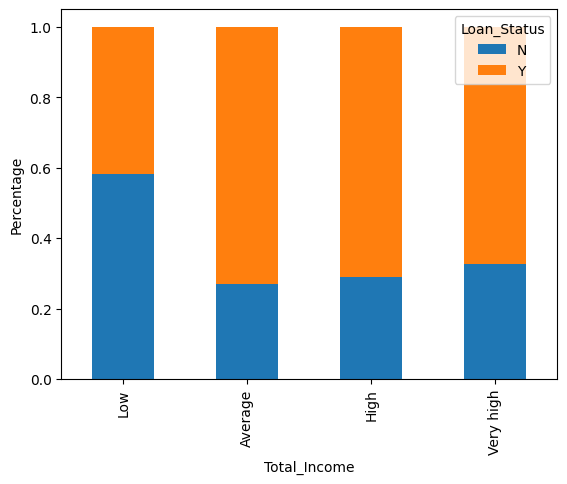

In [82]:
df_train['Total_Income'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

- The Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

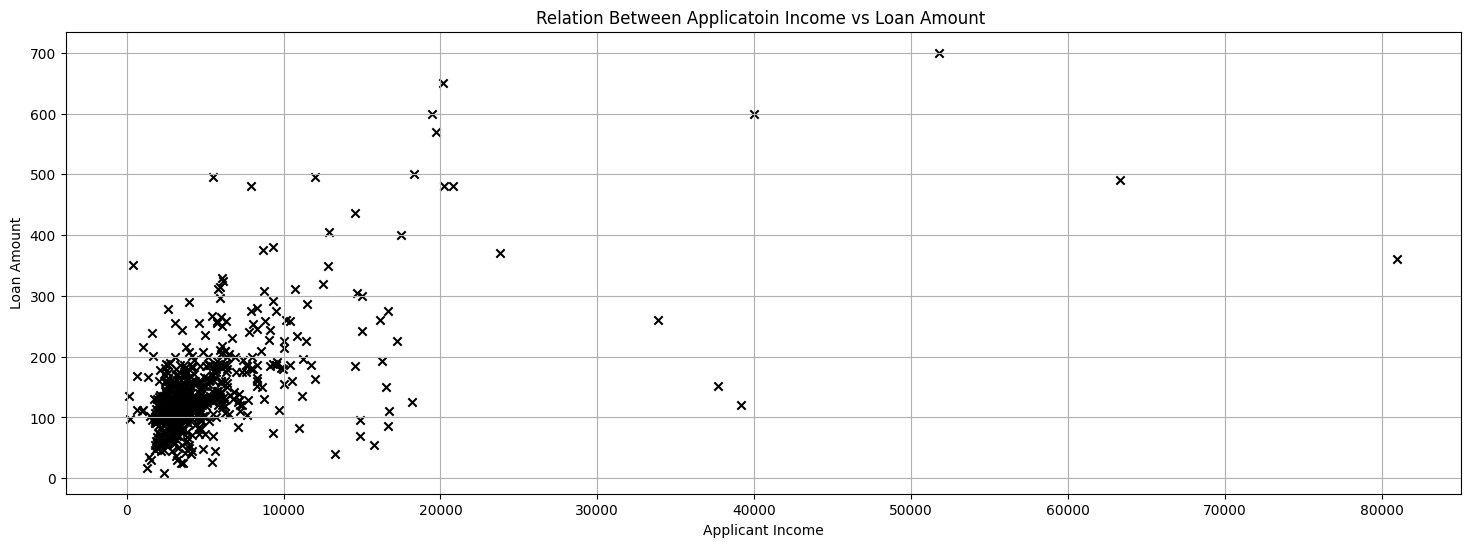

In [83]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df_train['ApplicantIncome'] , df_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

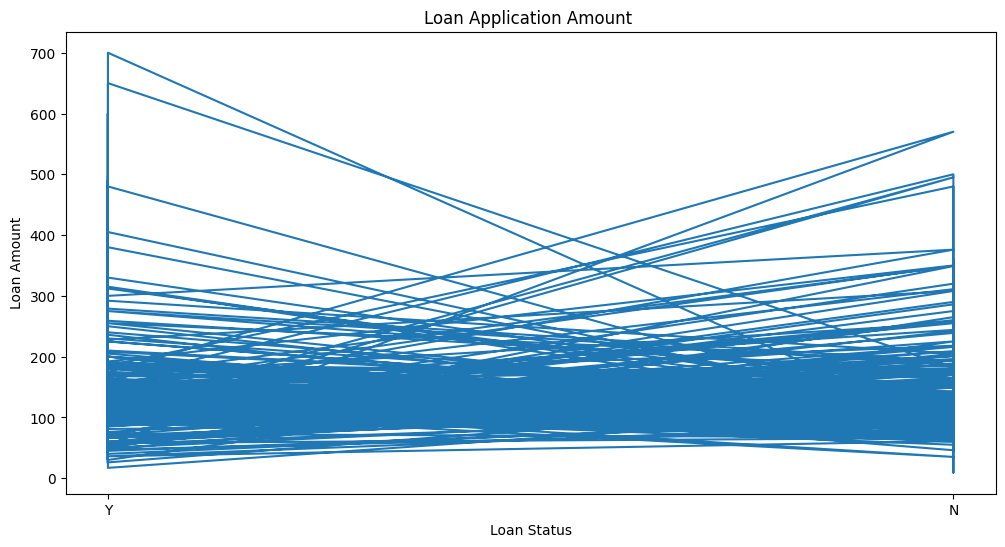

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['Loan_Status'], df_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [85]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High


In [86]:
print(df_train.Property_Area.unique())

['Urban' 'Rural' 'Semiurban']


In [87]:
df_train=df_train.drop(['Loan_ID','Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True)
df_train['Loan_Status'].replace('N', 0,inplace=True)
df_train['Loan_Status'].replace('Y', 1,inplace=True)
df_train['Gender'].replace('Male', 0,inplace=True)
df_train['Gender'].replace('Female', 1,inplace=True)
df_train['Married'].replace('No', 0,inplace=True)
df_train['Married'].replace('Yes', 1,inplace=True)
df_train['Education'].replace('Not Graduate', 0,inplace=True)
df_train['Education'].replace('Graduate', 1,inplace=True)
df_train['Self_Employed'].replace('No', 0,inplace=True)
df_train['Self_Employed'].replace('Yes', 1,inplace=True)
df_train['Property_Area'].replace('Rural', 1,inplace=True)
df_train['Property_Area'].replace('Semiurban', 2,inplace=True)
df_train['Property_Area'].replace('Urban', 3,inplace=True)


/tmp/ipykernel_10998/1137912016.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Dependents'].replace('3+', 3,inplace=True)
/tmp/ipykernel_10998/1137912016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

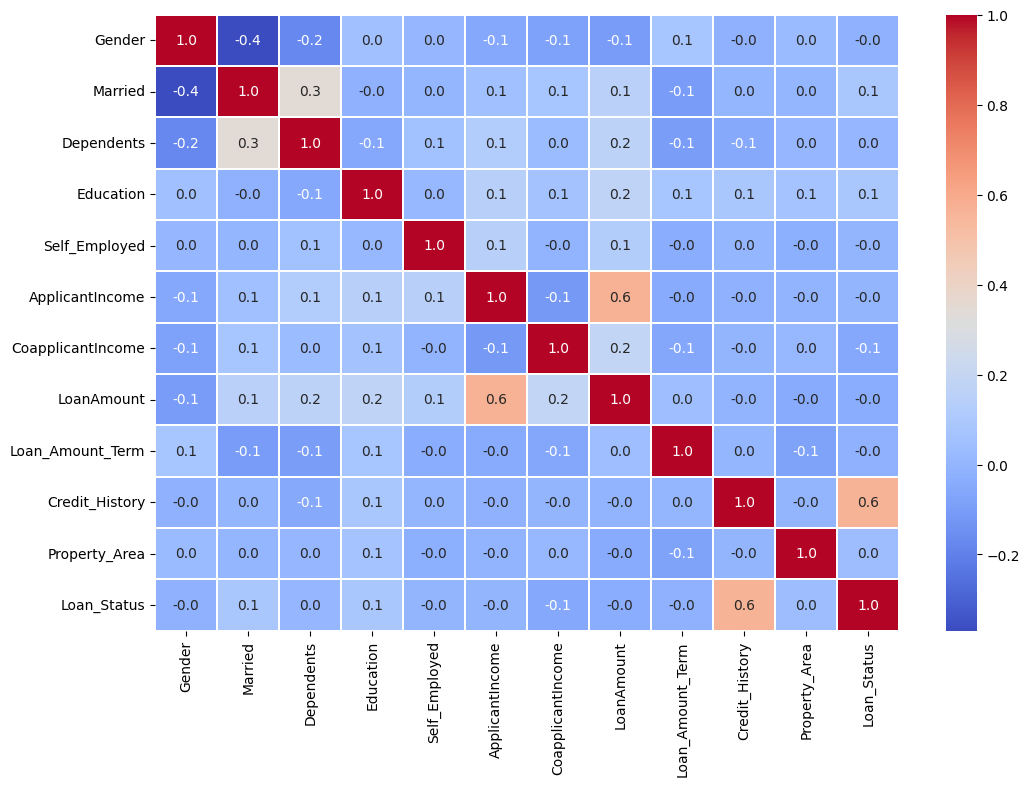

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()